In [322]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.datasets import *

boston = load_boston()


First create a data frame and take a peek

In [321]:
print("Contents of the data: " + str(boston.keys()) + '\n')
boston_df = pd.DataFrame(boston['data'])
boston_df.columns = boston['feature_names']
boston_df['Price'] = boston['target']
print(boston.DESCR)
boston_df.head()

Contents of the data: dict_keys(['data', 'target', 'feature_names', 'DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value prop

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


More data exploration: <br>
First, plot histograms of the features to see if they're skewed. If so, I'll scale and normalize the data.

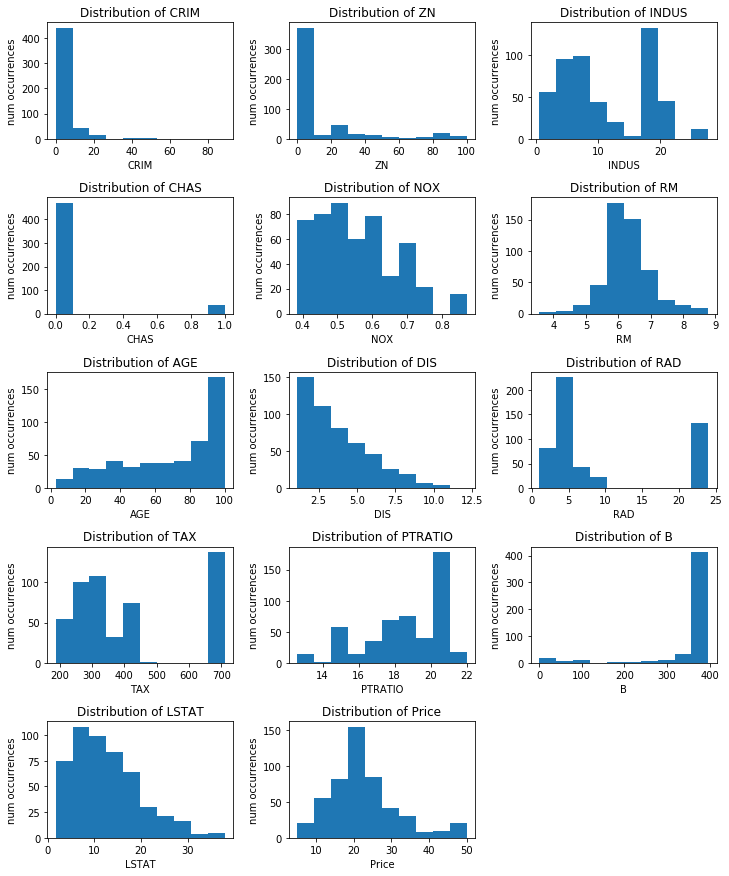

In [308]:
plt.figure(figsize=(12,15))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for i in range(len(boston_df.columns)):
    plt.subplot(5,3,i+1)
    plt.hist(boston_df.iloc[:,i])
    plt.title("Distribution of " + str(list(boston_df.columns)[i]))
    plt.xlabel(str(list(boston_df.columns)[i]))
    plt.ylabel("num occurrences")

plt.show()

Next, check the correlation among the variables with a covariance matrix and visualize the relation between the target and each of the features with scatter plots. 

In [309]:
boston_df=(boston_df-boston_df.mean())/boston_df.std()
boston_df[['Price', 'CRIM', 'ZN', 'INDUS', 'CHAS', 
          'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
          'PTRATIO', 'B', 'LSTAT']].corr()

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Price,1.000000,-0.385832,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.385832,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,0.360445,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


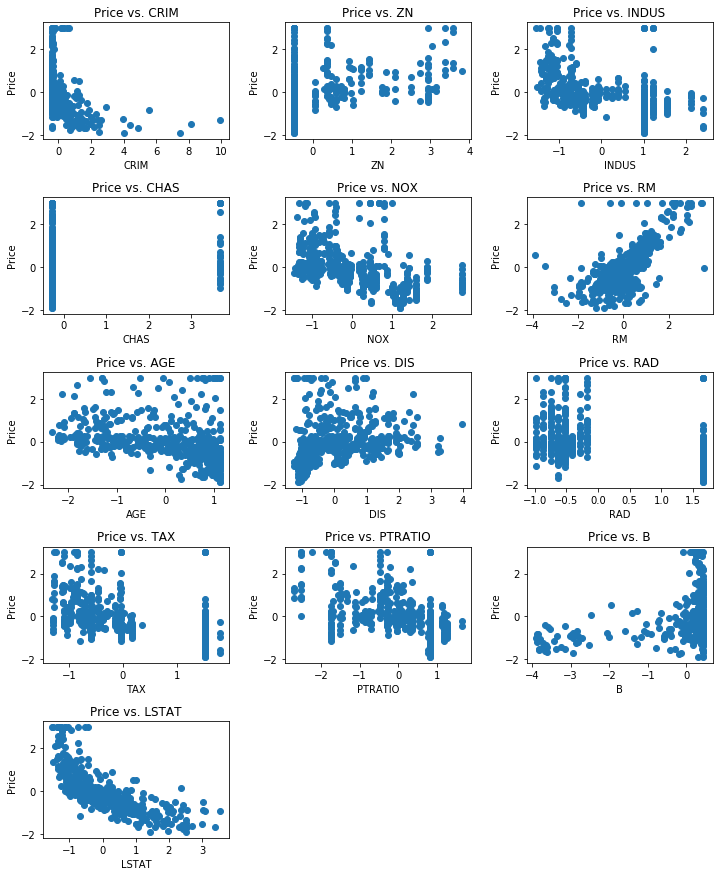

In [310]:
plt.figure(figsize=(12,15))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for i in range(len(boston_df.columns) - 1):
    plt.subplot(5,3,i+1)
    plt.scatter(boston_df.iloc[:,i], boston_df['Price'])
    plt.title("Price vs. " + str(list(boston_df.columns)[i]))
    plt.xlabel(str(list(boston_df.columns)[i]))
    plt.ylabel("Price")

plt.show()

In [323]:
import statsmodels.api as sm

X = boston_df.drop('Price', axis=1)
y = boston_df['Price']

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 20 Jul 2019   Prob (F-statistic):          6.95e-135
Time:                        22:09:12   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

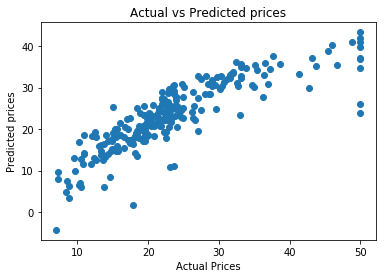

R-squared of the model in the training set is: 0.7502762489115937
Mean squared error: 23.283


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 20 Jul 2019   Prob (F-statistic):          6.95e-135
Time:                        22:12:55   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=10)


lrm = linear_model.LinearRegression()
lrm.fit(X,y)

lrm_pred = lrm.predict(X_test)

plt.scatter(y_test, lrm_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")
plt.show()

mse = metrics.mean_squared_error(y_test, lrm_pred)
print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("Mean squared error: " + str(mse)[:6])


# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

The linear regression model yielded an R-squared of 0.741 and a mean squared error of 0.2529. Now for comparison I'll run a K-nearest neighbors model with k values of 2 through 10:

Unweighted K-Nearest Neighbors Regression, k = 2-10


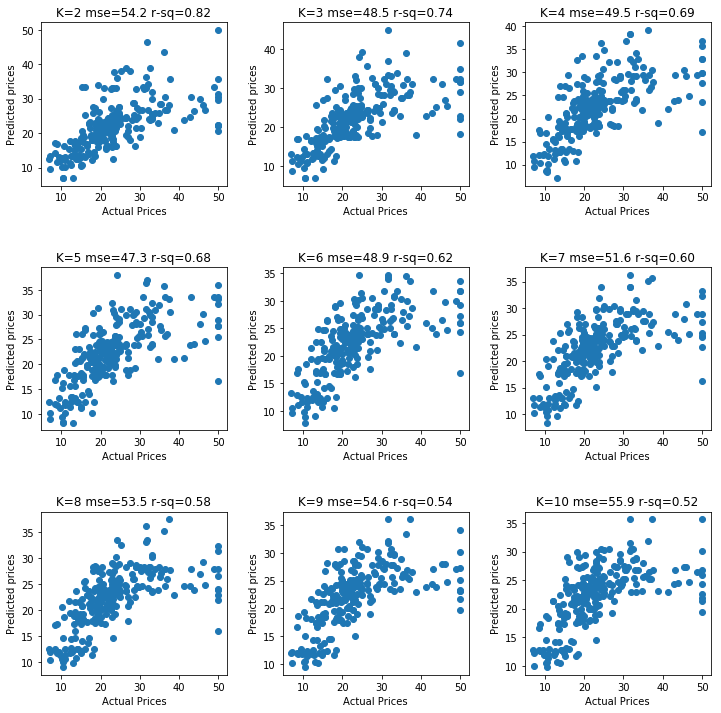

In [325]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

print("Unweighted K-Nearest Neighbors Regression, k = 2-10")

for i in range(2, 11):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(X_train, y_train)
    knr_pred = knr.predict(X_test)
    mse = sklearn.metrics.mean_squared_error(y_test, knr_pred)
    rsq = knr.score(X_train, y_train)
    #plot
    plt.subplot(3,3,i-1)
    plt.scatter(y_test, knr_pred)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted prices")
    plt.title("K=" + str(i) + " mse=" + str(mse)[:4] + " r-sq=" + str(rsq)[:4])
plt.show()


In [176]:
from sklearn.model_selection import cross_val_score
knr_w = KNeighborsRegressor(n_neighbors=4, weights='distance')

score = cross_val_score(knr, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knr_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.49 (+/- 0.28)
Weighted Accuracy: 0.49 (+/- 0.29)


In this example the linear regression model performed better than the KNN regression model. This implies several things about the data. As a parametric approach, it indicates a linear form for the model. <br>
As a non-parametric approach, KNN doesn't make any strong assumptions about the form of the model and is therefore more flexible. But in the case of using this datset to determine Boston house prices, there aren't enough observations (506) to make KNN as effective as linear regression.